<a href="https://colab.research.google.com/github/DevFreak-ui/MMAD/blob/main/MMAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

In [2]:
# Import captions from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load captions
dataset_path = '/content/drive/MyDrive/flickr8k_captions.csv'

# Confirm captions are loaded
df = pd.read_csv(dataset_path, header=0)
df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


### **Word Count**

Distribution of word counts per caption

In [5]:
# Calculate words per caption
df['word_count'] = df['caption'].apply(lambda x: len(x.split()) - 1)
df['word_count']

,word_count
0,17
1,7
2,8
3,9
4,12
...,...
40450,9
40451,9
40452,15
40453,7


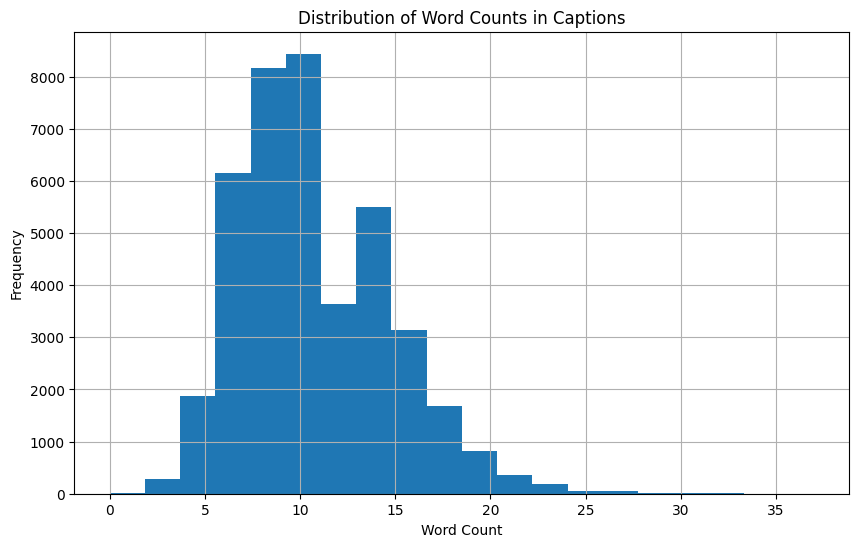

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of word counts
plt.figure(figsize=(10,6))
df['word_count'].hist(bins=20)
plt.title('Distribution of Word Counts in Captions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### **Word Cloud**

Word clouds visualizing the most frequent words or phrases.

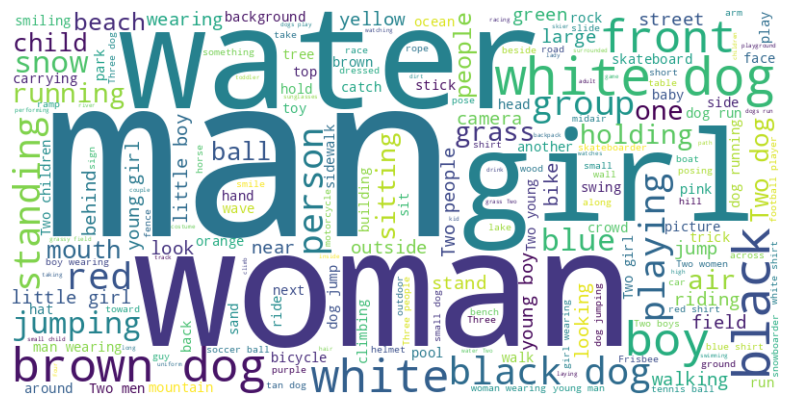

In [7]:
from wordcloud import WordCloud

# Join all captions into a single string
all_captions = ' '.join(df['caption'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Text Similarity**

Calculate the cosine similarity between captions to quantify their semantic similarity

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

# Example: calculate similarity between captions of the first image
captions = df[df['image'] == '1001773457_577c3a7d70.jpg']['caption']

# Convert the captions to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(captions)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# cosine_sim = np.round(cosine_similarity(tfidf_matrix, tfidf_matrix, dense_output=False), decimals=3)

# Display the cosine similarity matrix
print(cosine_sim, "\n")

# Obtain max non-one value
tensor = torch.Tensor(cosine_sim)
filtered = tensor[tensor != 1]
print(f"Most similar captions: {torch.max(filtered)}")

[[1.         0.39878102 0.42223888 0.         0.        ]
 [0.39878102 1.         0.44259564 0.26210189 0.15988761]
 [0.42223888 0.44259564 1.         0.17754914 0.07988071]
 [0.         0.26210189 0.17754914 1.         0.3603498 ]
 [0.         0.15988761 0.07988071 0.3603498  1.        ]] 

Most similar captions: 0.44259563088417053


What can we do with this?

We can use this to randomly select one of the captions with high similarity index

## Similarity Index Calculation Sample between Two sentences

In [18]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 11.5 MB/s eta 0:00:00


In [22]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained BERT-based model for sentence embeddings
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Sentences
sentence1 = "The cat is on the mat."  # Original English sentence
sentence2 = "The dog is on the mat"  # Back-translated English sentence

# Generate embeddings for both sentences
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# Compute cosine similarity between the two sentence embeddings
cos_sim = util.cos_sim(embedding1, embedding2)

# Output the cosine similarity score
print(f"Cosine Similarity: {cos_sim.item():.4f}")
embedding1.shape

Cosine Similarity: 0.5444


torch.Size([768])

In [23]:
embedding1.shape, embedding2.shape

(torch.Size([768]), torch.Size([768]))